# Introduction to Regression

## A typical architecture of a regression neural network

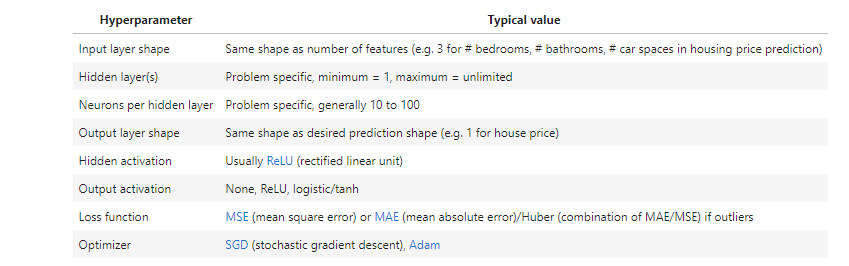

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.1


## Phase 01

### Creating sample data

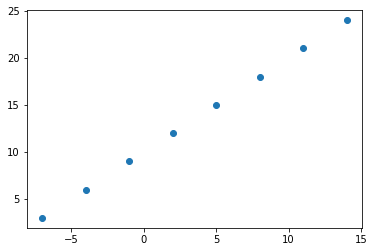

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# h(x) = x + 10
X = np.array([-7.0, -4.0,-1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y);

*Input & output shapes*

In [3]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [4]:
house_info[0], house_info[0].shape

(<tf.Tensor: shape=(), dtype=string, numpy=b'bedroom'>, TensorShape([]))

In [5]:
X[0], X[0].shape

(-7.0, ())

In [6]:
input_shape = X[0].shape 
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [7]:
X, y = tf.constant(X), tf.constant(y)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Modelling

* Create model
* Compile model (define loss function & optimizer)
* Fit model (try to find patterns between X and y)

In [9]:
tf.random.set_seed(42)

# Create model with Sequential
model = tf.keras.Sequential([
    # Single feature
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.fit(X, y, epochs=5)

Epoch 1/5


ValueError: in user code:

    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float64)
      • training=True
      • mask=None


In [10]:
tf.random.set_seed(42)

# Create model with Sequential
model = tf.keras.Sequential([
    # Single feature
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 444ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 103ms/step


array([[12.716021]], dtype=float32)

### Improving the model

Improving the model could be done by altering the steps taken to create it.

<img src='https://camo.githubusercontent.com/8a6f2fb40aa18ccc247b10b13c8e8eaf91ae0f9960f839ce3a4e61b876571d57/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f30322d696d70726f76696e672d612d6d6f64656c2d66726f6d2d6d6f64656c2d70657273706563746976652e706e67' />

*Trial with increased epochs*

In [12]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 421ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 96ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 5

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 71ms/step


array([[30.158512]], dtype=float32)

*Trial with Adam optimizer*

In [14]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 502ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.5003 - mae: 11.5003
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.4958 - mae: 11.4958
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4913 - mae: 11.4913
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.4868 - mae: 11.4868
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 11.4823 - mae: 11.4823
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 11.4778 - mae: 11.4778
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4733 - mae: 11.4733
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 11.4688 - mae: 11.4688
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 11.4643 - mae: 11.4643
Epoch 11/100
1/1 [==============================] - 0s 5m

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[11.490996]], dtype=float32)

*Trial with more hidden layers*

In [16]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 544ms/step - loss: 14.3227 - mae: 14.3227
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.7159 - mae: 13.7159
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.1797 - mae: 13.1797
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.6502 - mae: 12.6502
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 12.1496 - mae: 12.1496
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.6197 - mae: 11.6197
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0831 - mae: 11.0831
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5439 - mae: 10.5439
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9717 - mae: 9.9717
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 9.3118 - mae: 9.3118
Epoch 11/100
1/1 [==============================] - 0s 8ms/st

Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 3.5910 - mae: 3.5910
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 3.5025 - mae: 3.5025
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 3.5364 - mae: 3.5364
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 3.5218 - mae: 3.5218
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 3.4810 - mae: 3.4810
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 3.5419 - mae: 3.5419
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 3.4272 - mae: 3.4272
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 3.5736 - mae: 3.5736
Epoch 97/100
1/1 [==============================] - 0s 6ms/step - loss: 3.4663 - mae: 3.4663
Epoch 98/100
1/1 [==============================] - 0s 7ms/step - loss: 3.4981 - mae: 3.4981
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 135ms/step


array([[33.128654]], dtype=float32)

*Trial with different learning rate*

In [18]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 585ms/step - loss: 11.9988 - mae: 11.9988
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3689 - mae: 11.3689
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7369 - mae: 10.7369
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1021 - mae: 10.1021
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.5563 - mae: 9.5563
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.0396 - mae: 9.0396
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.5056 - mae: 8.5056
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.9525 - mae: 7.9525
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3796 - mae: 7.3796
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.7852 - mae: 6.7852
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - los

1/1 [==============================] - 0s 6ms/step - loss: 0.3172 - mae: 0.3172
Epoch 90/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3141 - mae: 0.3141
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2972 - mae: 0.2972
Epoch 92/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3226 - mae: 0.3226
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2510 - mae: 0.2510
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2271 - mae: 0.2271
Epoch 95/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2626 - mae: 0.2626
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2149 - mae: 0.2149
Epoch 97/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2555 - mae: 0.2555
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2352 - mae: 0.2352
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2078 - ma

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 211ms/step


array([[27.686483]], dtype=float32)

**Learning rate hyperparameter seems to have the biggest influence**

A typical workflow when building a neural network is as follows:

```
    while model is satisfiable:
        fit_model()
        evaluate_model()
        tweak_model()
```

## Phase 02

**Note** Visualization must always be done since this provides the most insight.

Visualize:
* The original data
* The model itself (architecture & different shapes)
* The training (how does a model perform while it learns?)
* The predictions

In [20]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [21]:
# Following same heuristic of y = x + 10
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

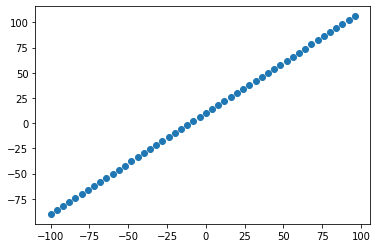

In [22]:
plt.scatter(X, y);

### Split data

Each set serves a specific purpose:
* Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

> **Note**: This step is typically done right at the start of a project (the test set should always be kept separate from all other data).The model must generalize to unseen examples.


In [23]:
len(X)

50

In [24]:
# Split data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

*Visualize datasets*

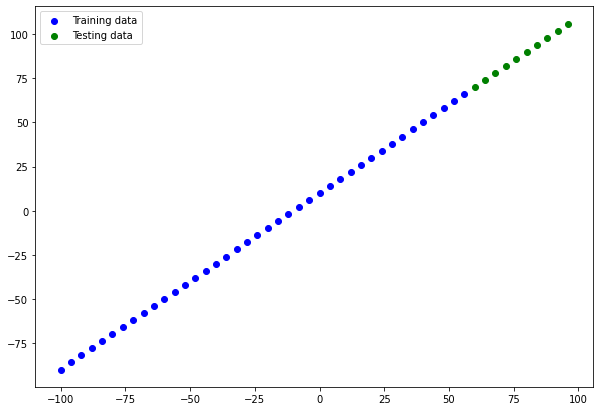

In [25]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend();

### Build neural network

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.build()

ValueError: You must provide an `input_shape` argument.

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=[1], name='Input_layer'),
    tf.keras.layers.Dense(1, name='Output_layer')
])

model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.build()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 32)                64        
                                                                 
 Output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - the parameters the model can update as it trains.
* Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning

In [28]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 33.5768 - mae: 33.5768
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 28.0068 - mae: 28.0068
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 32.4246 - mae: 32.4246
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 30.8699 - mae: 30.8699
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.7001 - mae: 15.7001
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 12.4441 - mae: 12.4441
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.7074 - mae: 11.7074
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 12.0789 - mae: 12.0789
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 37.8191 - mae: 37.8191
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 25.4356 - mae: 25.4356
Epoch 11/100
2/2 [==============================] - 0s 5ms/

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_activations=True, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### Visualize predictions

In [32]:
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 62ms/step


In [33]:
y_preds

array([[ 70.32076 ],
       [ 74.89476 ],
       [ 79.46875 ],
       [ 84.04276 ],
       [ 88.61675 ],
       [ 93.19076 ],
       [ 97.76475 ],
       [102.338745],
       [106.91274 ],
       [111.48675 ]], dtype=float32)

In [34]:
def plot_predictions(
    train_data=X_train, 
    train_labels=y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    predictions=y_preds
):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

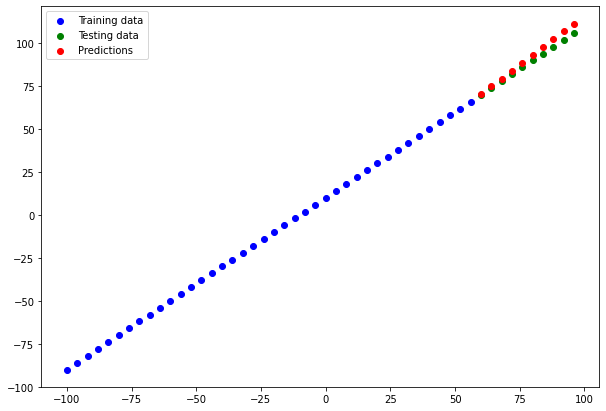

In [37]:
plot_predictions(
    X_train,
    y_train,
    X_test,
    y_test,
    y_preds
)

### Evaluate predictions

Two of the main metrics used for regression problems are:

* Mean absolute error (MAE) - the mean difference between each of the predictions.
* Mean squared error (MSE) - the squared mean difference between of the predictions

Use MSE if larger errors are more dangerous than smaller errors (an error of 10 is okay, but an error of 100 is a catastrophe, this will amplify the larger value due to it being squared)

In [38]:
# metrics specified in the compile function alongside the loss
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 293ms/step - loss: 2.9038 - mae: 2.9038


[2.9037528038024902, 2.9037528038024902]

*Mean absolute error*

In [48]:
y_preds = tf.constant(y_preds)
y_preds

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.32076 ],
       [ 74.89476 ],
       [ 79.46875 ],
       [ 84.04276 ],
       [ 88.61675 ],
       [ 93.19076 ],
       [ 97.76475 ],
       [102.338745],
       [106.91274 ],
       [111.48675 ]], dtype=float32)>

In [50]:
y_test = tf.constant(y_test)
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

**Predictions & ground truths aren't in the same shape**

In [51]:
tf.keras.losses.mae(y_test, y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.74339 , 14.263144, 11.8125  , 10.391447, 10.      , 10.638151,
       12.305899, 15.070996, 18.912743, 23.486748], dtype=float32)>

In [52]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.32076 ,  74.89476 ,  79.46875 ,  84.04276 ,  88.61675 ,
        93.19076 ,  97.76475 , 102.338745, 106.91274 , 111.48675 ],
      dtype=float32)>

In [53]:
# Squeeze preds to same dimension as ground truth
tf.keras.losses.mae(y_test, tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=2.9037528>

In [55]:
# Or add dimension to ground truths
np.mean(tf.keras.losses.mae(tf.expand_dims(y_test, axis=-1), y_preds))

2.9037528

*Mean Squared Error*

In [56]:
tf.keras.losses.mse(y_test, tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=11.149939>

In [57]:
np.mean(tf.keras.losses.mse(tf.expand_dims(y_test, axis=-1), y_preds))

11.149939

In [72]:
# Create a couple of loss functions to make eval easier
def mae(y_test, y_pred):
    return tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
  
def mse(y_test, y_pred):
    return tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

### Experimentation to improve model

**Note** Start will smaller subsets of the dataset, once experimentation is complete move on to the complete dataset

Lets build 3 models and compare their results:
* model_1 - same as original model, 1 layer, trained for 100 epochs.
* model_2 - 2 layers, trained for 100 epochs.
* model_3 - 2 layers, trained for 500 epochs.

In [64]:
# Create model 1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model_1.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=['mae']
)

model_1.build()
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 10.2785 - mae: 10.2785
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 8.1853 - mae: 8.1853
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 14.9807 - mae: 14.9807
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.1127 - mae: 8.1127
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.6954 - mae: 10.6954
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.8930 - mae: 9.8930
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.9557 - mae: 8.9557
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0668 - mae: 9.0668
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 19.7357 - mae: 19.7357
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.6543 - mae: 10.6543
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - los

2/2 [==============================] - 0s 5ms/step - loss: 10.5080 - mae: 10.5080
Epoch 89/100
2/2 [==============================] - 0s 5ms/step - loss: 7.2283 - mae: 7.2283
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 12.6356 - mae: 12.6356
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 7.2754 - mae: 7.2754
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6348 - mae: 7.6348
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 7.0971 - mae: 7.0971
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 12.4871 - mae: 12.4871
Epoch 95/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8617 - mae: 9.8617
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1364 - mae: 9.1364
Epoch 97/100
2/2 [==============================] - 0s 8ms/step - loss: 12.1101 - mae: 12.1101
Epoch 98/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0

1/1 [==============================] - 0s 21ms/step


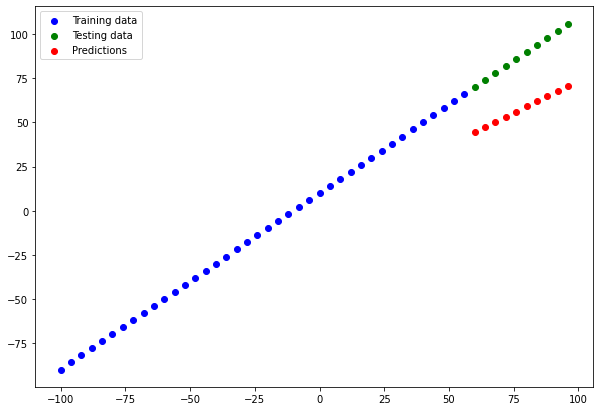

In [68]:
model_1_preds = model_1.predict(X_test)
plot_predictions(predictions=model_1_preds)

In [122]:
mae_1, mse_1 = mae(y_test, model_1_preds), mse(y_test, model_1_preds)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.41159>,
 <tf.Tensor: shape=(), dtype=float32, numpy=935.117>)

In [110]:
# Create model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

model_2.build()
model_2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
 dense_32 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [111]:
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 22.6625 - mse: 730.7203
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 16.9439 - mse: 457.8568
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 13.8059 - mse: 246.0894
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 17.4504 - mse: 427.5065
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 12.0637 - mse: 183.7776
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8335 - mse: 113.4307
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 10.7023 - mse: 138.7539
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 10.8713 - mse: 139.0908
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 38.0435 - mse: 2242.6606
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 25.6226 - mse: 922.2128
Epoch 11/100
2/2 [==============================]

1/1 [==============================] - 0s 50ms/step


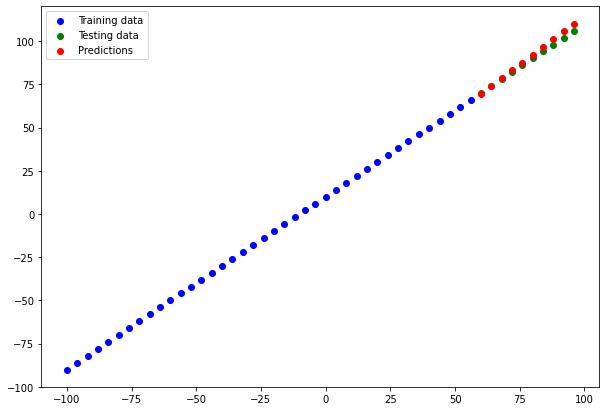

In [112]:
model_2_preds = model_2.predict(X_test)
plot_predictions(predictions=model_2_preds)

In [120]:
mae_2, mse_2 = mae(y_test, model_2_preds), mse(y_test, model_2_preds)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9097328>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.45877>)

In [114]:
# Create model 3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

model_3.build()
model_3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 1)                 2         
                                                                 
 dense_34 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [115]:
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 22.6625 - mse: 730.7203
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 16.9439 - mse: 457.8568
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 13.8059 - mse: 246.0894
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 17.4504 - mse: 427.5065
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 12.0637 - mse: 183.7776
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 9.8335 - mse: 113.4307
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 10.7023 - mse: 138.7539
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 10.8713 - mse: 139.0908
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 38.0435 - mse: 2242.6606
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 25.6226 - mse: 922.2128
Epoch 11/500
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 9.5960 - mse: 170.5474
Epoch 171/500
2/2 [==============================] - 0s 5ms/step - loss: 15.8613 - mse: 378.2545
Epoch 172/500
2/2 [==============================] - 0s 4ms/step - loss: 13.8936 - mse: 285.0436
Epoch 173/500
2/2 [==============================] - 0s 4ms/step - loss: 22.5890 - mse: 721.6303
Epoch 174/500
2/2 [==============================] - 0s 6ms/step - loss: 11.3498 - mse: 179.6898
Epoch 175/500
2/2 [==============================] - 0s 5ms/step - loss: 20.0652 - mse: 651.0227
Epoch 176/500
2/2 [==============================] - 0s 4ms/step - loss: 7.4087 - mse: 68.9827
Epoch 177/500
2/2 [==============================] - 0s 5ms/step - loss: 8.5979 - mse: 105.2247
Epoch 178/500
2/2 [==============================] - 0s 6ms/step - loss: 15.4691 - mse: 344.7018
Epoch 179/500
2/2 [==============================] - 0s 4ms/step - loss: 9.3099 - mse: 120.5478
Epoch 180/500
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 19.9557 - mse: 586.2062
Epoch 339/500
2/2 [==============================] - 0s 6ms/step - loss: 34.3118 - mse: 1762.2229
Epoch 340/500
2/2 [==============================] - 0s 3ms/step - loss: 8.7204 - mse: 107.9193
Epoch 341/500
2/2 [==============================] - 0s 4ms/step - loss: 21.9521 - mse: 673.2398
Epoch 342/500
2/2 [==============================] - 0s 6ms/step - loss: 13.8474 - mse: 256.6479
Epoch 343/500
2/2 [==============================] - 0s 4ms/step - loss: 11.6931 - mse: 181.4211
Epoch 344/500
2/2 [==============================] - 0s 5ms/step - loss: 10.6911 - mse: 227.7043
Epoch 345/500
2/2 [==============================] - 0s 4ms/step - loss: 30.9080 - mse: 1343.6312
Epoch 346/500
2/2 [==============================] - 0s 5ms/step - loss: 10.6418 - mse: 260.5352
Epoch 347/500
2/2 [==============================] - 0s 5ms/step - loss: 25.5682 - mse: 915.7305
Epoch 348/500
2/2 [========================

1/1 [==============================] - 0s 81ms/step


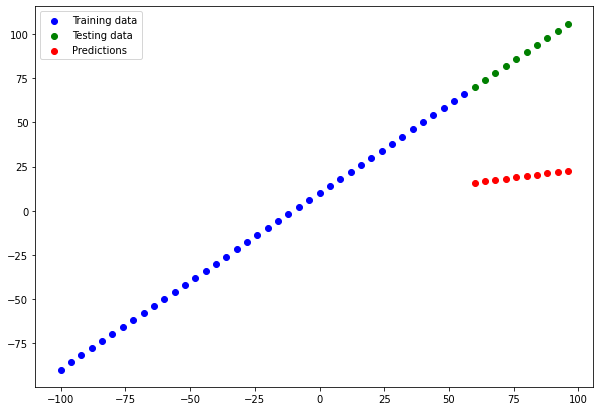

In [116]:
model_3_preds = model_3.predict(X_test)
plot_predictions(predictions=model_3_preds)

In [119]:
mae_3, mse_3 = mae(y_test, model_3_preds), mse(y_test, model_3_preds)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.68784>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4804.469>)

### Comparing experiment results

In [129]:
model_results = [
    ['model_1', mae_1.numpy(), mse_1.numpy()],
    ['model_2', mae_2.numpy(), mse_2.numpy()],
    ['model_3', mae_3.numpy(), mse_3.numpy()]
]

In [130]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,30.411591,935.117004
1,model_2,1.909733,5.458770
2,model_3,68.687843,4804.469238


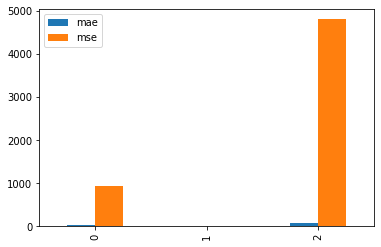

In [131]:
all_results.plot(kind='bar');

`model_2` performed the best. Therefore, it is not always the case that if you make the model more complex it'll perform better - and it could also be the exact opposite. In this case, `model_3` has overfitted

**Note**: One of the main goals should be to minimize the time between  experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work.

### Saving models

A model can be saved in two ways:
* The SavedModel format (default)
* The HDF5 format

The main difference between the two is: the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in. This option should suffice almost always.

Hdf5 is better if the model must be used outside the actual TensorFlow code (with an application backend)

In [132]:
# Save model using default way
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [134]:
# Save model using HDF5
model_2.save('best_model_hdf5_format.h5')

### Load model

*Load SavedModel format*

In [147]:
loaded_model_sm = tf.keras.models.load_model('best_model_SavedModel_format')

*Check if loaded model has same weights/structure/loss as `model_2`*

In [148]:
loaded_model_sm.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
 dense_32 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [136]:
model_2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
 dense_32 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [140]:
model_2.weights

[<tf.Variable 'dense_31/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0560399]], dtype=float32)>,
 <tf.Variable 'dense_31/bias:0' shape=(1,) dtype=float32, numpy=array([0.8454018], dtype=float32)>,
 <tf.Variable 'dense_32/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0696753]], dtype=float32)>,
 <tf.Variable 'dense_32/bias:0' shape=(1,) dtype=float32, numpy=array([0.7856247], dtype=float32)>]

In [149]:
loaded_model_sm.weights

[<tf.Variable 'dense_31/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0560399]], dtype=float32)>,
 <tf.Variable 'dense_31/bias:0' shape=(1,) dtype=float32, numpy=array([0.8454018], dtype=float32)>,
 <tf.Variable 'dense_32/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0696753]], dtype=float32)>,
 <tf.Variable 'dense_32/bias:0' shape=(1,) dtype=float32, numpy=array([0.7856247], dtype=float32)>]

In [150]:
loaded_model_sm_preds = loaded_model_sm.predict(X_test)
mae(y_test, loaded_model_sm_preds.squeeze()).numpy(), mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 219ms/step


(1.9097328, 1.9097328)

*Load hdf5 format*

In [151]:
loaded_model_h5 = tf.keras.models.load_model('best_model_hdf5_format.h5')

In [152]:
loaded_model_h5.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
 dense_32 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [153]:
loaded_model_h5_preds = loaded_model_h5.predict(X_test)
mae(y_test, loaded_model_h5_preds.squeeze()).numpy(), mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 147ms/step


(1.9097328, 1.9097328)